<a href="https://colab.research.google.com/github/evelinafischer/AH2179/blob/main/Assignment_1_BusDelayPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Assignment 1: Bus Delay Prediction**

####**Load and prepare the data**

In [ ]:
#Code from the tutorial

#Import the pandas library for data manipulation
import pandas as pd

#URL of the CSV file containing bus data
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'

#Read the CSV file from the URL and load it into a pandas DataFrame
df = pd.read_csv(url)

#Display the first 10 rows of the DataFrame to inspect the data
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [ ]:
#Code from the tutorial

#Select only the first 1000 records from the DataFrame
df = df.iloc[:1000]

In [ ]:
#Code from the tutorial

#Remove irrelevant columns from the DataFrame
#'Arrival_time', 'Stop_id', 'Bus_id', and 'Line_id' are dropped
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

#Display the first 10 rows
df.head(10)

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,-23,0,39,-4,28.641509
1,168,0,39,181,27.880597
2,231,0,39,244,27.852941
3,150,17,39,143,27.826087
4,965,35,51,947,42.029412
5,33,19,46,30,38.970588
6,75,26,46,63,38.840580
7,58,15,46,52,34.059701
8,904,35,46,888,34.102941
9,141,12,46,140,34.000000


In [ ]:
#Code from the tutorial

#Calculate the correlation between "Arrival_delay" and different input variables
#Compute pairwise correlations between all numeric columns
corr_matrix = df.corr()

#Sorting from highest to lowest correlation makes it easy to see which features are most positively associated with delays
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993908
Dwell_time,0.222777
Recurrent_delay,0.161830
Scheduled_travel_time,0.117362


In [ ]:
#Code from the tutorial

#Prepare the input features, X, and target variable, y, for modeling.
x = df.drop(['Arrival_delay'], axis=1) #X contains all columns except the target 'Arrival_delay'
y = df['Arrival_delay'] #y contains only the target variable 'Arrival_delay'

####**Train/ Test Split**

In [ ]:
#Code from the tutorial

#Import the function to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
#X_train, y_train → the training set the model will learn from, 80% of the data
#X_test, y_test → the test set used to evaluate the model's performance, 20% of the data
#test_size=0.2 → specifies that 20% of the data is reserved for testing
#random_state=42 → ensures the split is reproducible, giving the same train/test sets each time
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###**Creating an XGBoost Regression Model**

In [ ]:
#Code from https://machinelearningmastery.com/xgboost-for-regression/

#Import the XGBoost library
import xgboost as xgb

#Create an XGBoost regressor model with default parameters
model = xgb.XGBRegressor()

#Train the model using the training data
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

####**Evaluate the XGBoost Regression Model**

In [ ]:
#Code from the tutorial

#Import evaluation metrics from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Calculate Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)

#Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)

#Calculate R-squared to measure the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)

#Print the evaluation results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 11.730996131896973
Mean Squared Error: 253.85116577148438
R-squared: 0.989790678024292


####**Visualize the results - XGBoost Regression Model**

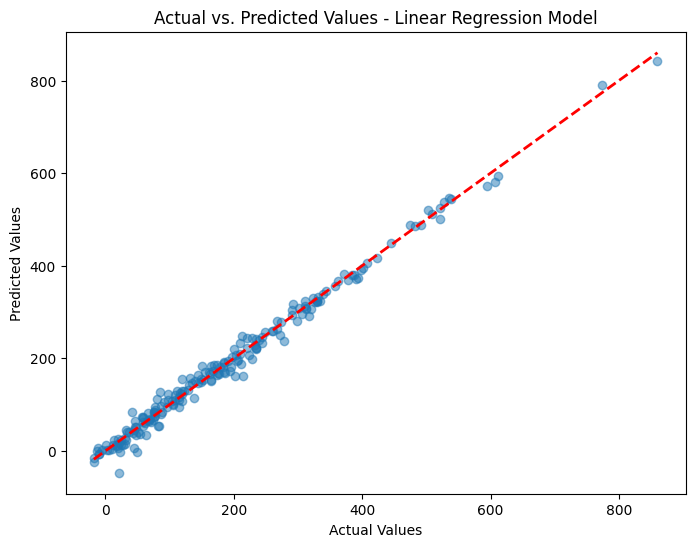

In [ ]:
#Code from the tutorial

#Import matplotlib for plotting
import matplotlib.pyplot as plt

#y_test contains the true target values, actual bus delays
#y_pred contains the predicted values from the XGBoost model

#Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  #Each point represents one test sample

#Add labels and a title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Linear Regression Model")

#Add a diagonal line representing perfect predictions
#Points on this line mean the prediction exactly matches the true value
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

#Display the plot
plt.show()

###**AI Model**

####**Normalization**
Scale all inputs to the same range

In [ ]:
#Code from the tutorial

#Import StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler object
#StandardScaler will transform features to have mean = 0 and standard deviation = 1
scaler = StandardScaler()

#Fit the scaler on the training features and transform them
#This ensures all features are on the same scale for the model
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test features using the same scaler
#Important: we do NOT fit on test data to avoid data leakage
X_test_scaled = scaler.transform(X_test)

####**Grid search**
Find the best hyperparamters for the normalized data

In [ ]:
#Code from the tutorial

#Import GridSearchCV for hyperparameter tuning and SVR (Support Vector Regression)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#Define a parameter grid for tuning the SVM model
#'kernel': type of function used to map the data ('linear' or 'rbf')
#'C': regularization parameter controlling the trade-off between fitting the training data and keeping the model simple
#'epsilon': margin of tolerance in regression (how much error is ignored)
param_grid = {
    'kernel': ['linear',  'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

#Create a GridSearchCV object
#SVR() → the SVM regression model to tune
#param_grid → all combinations of hyperparameters to test
#cv=5 → use 5-fold cross-validation on the training data to evaluate each combination
#verbose=2 → print progress so one can see what the grid search is doing
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

#Fit the grid search to the normalized training data
#This trains many SVM models with all hyperparameter combinations and evaluates them using cross-validation
grid_search.fit(X_train_scaled, y_train)

#Get the best combination of hyperparameters found by grid search
best_params = grid_search.best_params_

#Print the best hyperparameters and the corresponding cross-validation score
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .....................C=1, epsilon=10, ke

####**Train the SVM Regression Model**

In [ ]:
#Code from the tutorial

#Create an SVR (Support Vector Regression) model using the best parameters from the grid search
#'kernel', 'C', and 'epsilon' are set to the values found as optimal during grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

#Train the SVM model on the training data
best_svr.fit(X_train_scaled, y_train)

SVR(C=10, epsilon=10, kernel='linear')

####**Evaluation - SVM Regression Model**

In [ ]:
#Code fromt the tutorial

#Import metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Use the trained SVM model to predict target values for the test set
y_pred = best_svr.predict(X_test_scaled)

#Calculate Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)

#Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)

#Calculate R-squared to measure the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)

#Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9.037586184544434
Mean Squared Error: 167.55570797584724
R-squared: 0.9932613049903283


####**Visualize the results - SVM Regression Model**

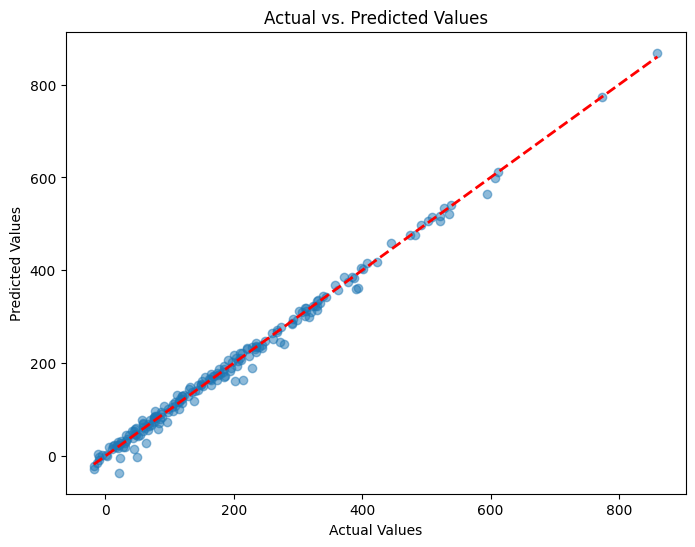

In [ ]:
#Code from the tutorial

#Import matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt

#y_test contains the actual target values for the test dataset
#y_pred contains the predicted values from the trained SVM model

#Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5) #Each point represents actual vs. predicted


#Add labels and a title for clarity
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - SVM Regression Model")

#Add a diagonal line representing perfect predictions, y_pred = y_test
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

#Display the plot
plt.show()

##**Sources**
https://machinelearningmastery.com/xgboost-for-regression/ (Accessed: 2025-08-27)